In [1]:
import numpy as np
import pandas as pd
import math
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from warnings import simplefilter
simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

In [2]:
pasta = '/mnt/HD_500GB_WD/00_Doutorado/Codigos_Notebooks_Medias_Resample/Dataframes_Media1m/'
# pasta = '/media/andre/SAMSUNG/03_HD_500GB_WD/00_Doutorado/Codigos_Notebooks_Medias_Resample/Dataframes_Media1m/'

### Abrindo os .pkl com medias 1min:
### Propriedades ópticas:
# abs_550_1 = pd.read_pickle(pasta+'1ogrenM1_Ba_G_Dry_1um_PSAP3W_1_df_T_dias_raw_1m.pkl')
Bs_550_1 = pd.read_pickle(pasta+'1ogrenM1_Bs_G_Dry_1um_Neph3W_1_df_T_dias_raw_1m.pkl')
# Bbs_550_1 = pd.read_pickle(pasta+'1ogrenM1_Bbs_G_Dry_1um_Neph3W_1_df_T_dias_raw_1m.pkl')
aod = pd.read_pickle(pasta+'AOD_AERONET_processado.pkl')
aod2 = pd.read_pickle(pasta+'mfrsraod1michM1_aerosol_optical_depth_filter2_df_T_dias_raw_1m.pkl')

### Concentrações volumétricas:
org = pd.read_pickle(pasta+'acsmS1_total_organics_df_T_dias_raw_1m.pkl')
ccn = pd.read_pickle(pasta+'ccn1colM1_b1_N_CCN_df_T_dias_raw_1m.pkl')
o3 = pd.read_pickle(pasta+'o3S1_o3_df_T_dias_raw_1m.pkl')
o3filt = o3[(o3>0.0) & (o3<30.0)]
o3aero = pd.read_pickle(pasta+'Ozone_AERONET_processado.pkl')

In [3]:
# dup = {x for x in lista if lista.count(x) > 1}
# print(dup)

In [4]:
datasets = [Bs_550_1, aod, aod2, org, ccn, o3filt, o3aero]
nomes = ['Bs_550_1', 'AOD', 'AOD', 'org', 'ccn', 'o3filt', 'o3aero']
labels = [u'$\\beta$$_e$$_s$$_p$$_.$', 'AOD', 'AOD', 'Org.', 'CCN', 'O$_{3}$', 'O$_{3}$']
# datasets = [Bs_550_1, aod, aod2, org, ccn]
# nomes = ['Bs_550_1', 'AOD', 'AOD', 'org', 'ccn']
# labels = [u'$\\sigma$$_s$$_c$$_t$', 'AOD', 'AOD', 'Total Organics', 'CCN']

In [5]:
### Função para padronizar o formato do índice (minutos) e das datas nas colunas (padrão: 'DD/MM/AAAA'):
def padroniza_datas(df):
    mins = np.arange(0, 1440, 1)
    datas = list(df.columns)
    datas_arrumadas = []
    for dia in datas:
        if len(dia)==10:
            datas_arrumadas.append(dia)
        elif len(dia)==8:
            ltemp = []
            for c in dia:
                ltemp.append(c)
            ltemp.insert(0,'0')
            ltemp.insert(3,'0')
            datas_arrumadas.append(''.join(ltemp))
        elif len(dia)==9 and dia[1]=='/':
            ltemp = []
            for c in dia:
                ltemp.append(c)
            ltemp.insert(0,'0')
            datas_arrumadas.append(''.join(ltemp))
        elif len(dia)==9 and dia[1]!='/':
            ltemp = []
            for c in dia:
                ltemp.append(c)
            ltemp.insert(3,'0')
            datas_arrumadas.append(''.join(ltemp))
    df.columns = datas_arrumadas
    df.index = mins
    df.index.name = "tempo"
    df.columns.name = "dias"
    
### Chamando a função padroniza_datas:
for ds, nome in zip(datasets, nomes):
    padroniza_datas(ds)

In [6]:
### Construindo uma lista de dataframes, onde cada um é um dataframe.describe():
stats = [datasets[n].describe() for n in range(len(datasets))]

In [7]:
### Função que constrói o dataframe com as datas do GoAmazon (01/01/14 a 31/12/15) cheio de NaN's. Depois disso
### insere os dias de 2014 e de 2015 faltantes nos dataframes que contém as estatísticas dos dados:
def completa_dias_goamazon_describe(df):
    days = pd.date_range(start="2014-01-01", end='2015-12-31',freq='D').strftime('%d/%m/%Y')
    mins = np.arange(0, 8, 1)
    df_nans = pd.DataFrame(columns=days, index=mins)    
    booleanos = []
    for dia in list(df_nans.columns):
        booleanos.append(dia in list(df.columns))
    for i in range(len(booleanos)):
        if booleanos[i] == True:     # Há dados neste dia
            pass
        elif booleanos[i] == False:  # Não há dados neste dia
            df.insert(i, column=df_nans.columns[i], value=df_nans.T.iloc[i].values)

In [8]:
### Chamando a função completa_dias_goamazon_describe:
for described in stats:
    completa_dias_goamazon_describe(described)

### Verificando se todos os dataframes da lista stats tem a mesma quantidade de dias:
for ds in stats:
    print(len(ds.T))

730
730
730
730
730
730
730


In [9]:
### A partir das strings em cada coluna separando os que terminam em "2015", colocando essas strings em uma
### lista e usando essa lista para filtrar somente as colunas de 2015 no "df_lwc_cal":
colunas14, colunas15 = [], []
for col in stats[0].columns:
    if str(col).split('/')[-1] == '2014':
        colunas14.append(str(col))
    else:
        colunas15.append(str(col))

# stats14 = [stats[0][colunas14], stats[1][colunas14], stats[2][colunas14], stats[3][colunas14], 
#            stats[4][colunas14], stats[5][colunas14], stats[6][colunas14]]
stats15 = [stats[0][colunas15], stats[1][colunas15], stats[2][colunas15], stats[3][colunas15], 
           stats[4][colunas15], stats[5][colunas15], stats[6][colunas15]]

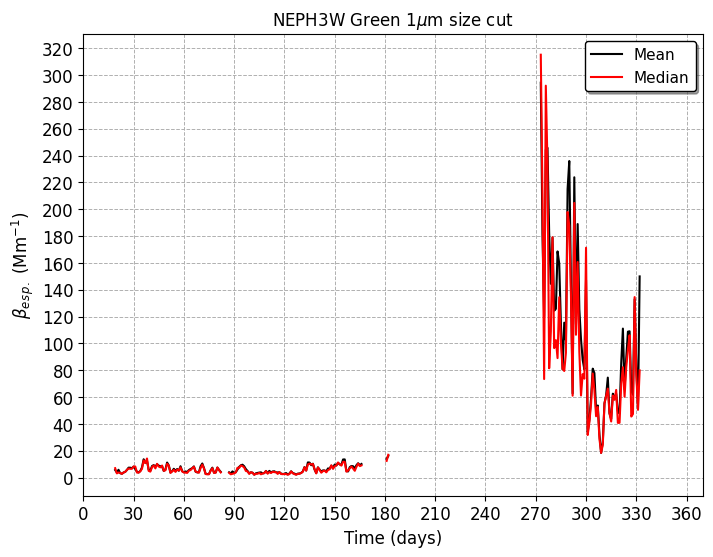

In [10]:
### Configurando a figura:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')
tf = 12
# tam_markers = 6
# loc_legendas = 2
limitesx = [0, 370]
# limitesy = [0.0, 200.0]
ax.set_xlabel('Time (days)', fontsize=tf)
ax.set_ylabel(labels[0]+' (Mm$^{-1}$)', fontsize=tf)
ax.set_title(u"NEPH3W Green 1$\mu$m size cut", fontsize=tf)
# ax.set_ylim(limitesy)
ax.set_xlim(limitesx)
ax.grid(visible=True, axis='both', linestyle='--', linewidth=0.7)
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.tick_params(labelsize=tf)

# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     ax.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors='dimgray', linewidth=0.85)

ax.plot(np.arange(len(colunas15)), stats15[0].T['mean'], 'k-', label='Mean')
ax.plot(np.arange(len(colunas15)), stats15[0].T['50%'], 'r-', label='Median')
# ax.legend(loc='best', fancybox=True, fontsize=tf-1, edgecolor='k', facecolor='white')
ax.legend(loc='best', ncol=1, fontsize=tf-1, fancybox=True, shadow=True,
          facecolor='white', edgecolor='black')

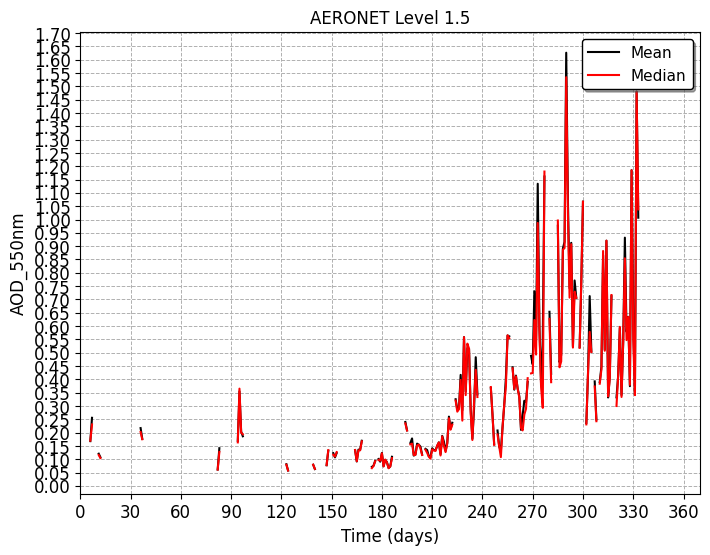

In [11]:
### Configurando a figura:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')
tf = 12
# tam_markers = 6
# loc_legendas = 2
limitesx = [0, 370]
# limitesy = [0.0, 1.0]
ax.set_xlabel('Time (days)', fontsize=tf)
ax.set_ylabel(labels[1]+'_550nm', fontsize=tf)
ax.set_title("AERONET Level 1.5", fontsize=tf)
# ax.set_ylim(limitesy)
ax.set_xlim(limitesx)
ax.grid(visible=True, axis='both', linestyle='--', linewidth=0.7)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.tick_params(labelsize=tf)

# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     ax.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors='dimgray', linewidth=0.85)

ax.plot(np.arange(len(colunas15)), stats15[1].T['mean'], 'k-', label='Mean')
ax.plot(np.arange(len(colunas15)), stats15[1].T['50%'], 'r-', label='Median')
# ax.legend(loc='best', fancybox=True, fontsize=tf-1, edgecolor='k', facecolor='white')
ax.legend(loc='best', ncol=1, fontsize=tf-1, fancybox=True, shadow=True,
          facecolor='white', edgecolor='black')

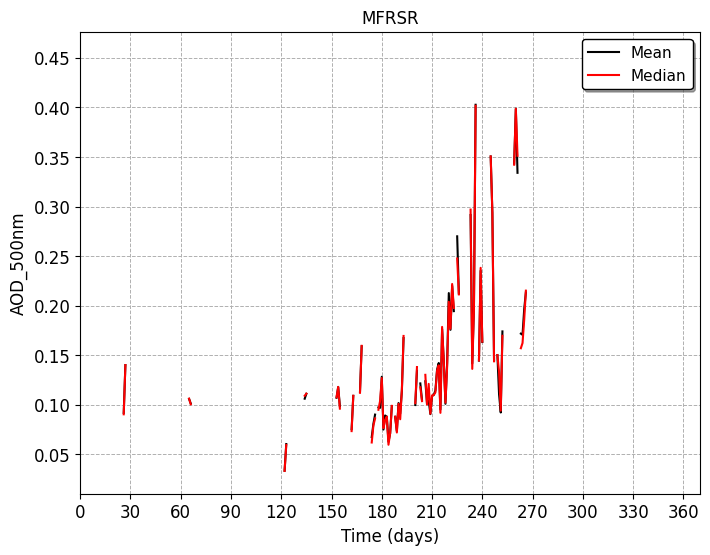

In [12]:
### Configurando a figura:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')
tf = 12
# tam_markers = 6
# loc_legendas = 2
limitesx = [0, 370]
# limitesy = [0.0, 1.0]
ax.set_xlabel('Time (days)', fontsize=tf)
ax.set_ylabel(labels[2]+'_500nm', fontsize=tf)
ax.set_title("MFRSR", fontsize=tf)
# ax.set_ylim(limitesy)
ax.set_xlim(limitesx)
ax.grid(visible=True, axis='both', linestyle='--', linewidth=0.7)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.tick_params(labelsize=tf)

# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     ax.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors='dimgray', linewidth=0.85)

ax.plot(np.arange(len(colunas15)), stats15[2].T['mean'], 'k-', label='Mean')
ax.plot(np.arange(len(colunas15)), stats15[2].T['50%'], 'r-', label='Median')
# ax.legend(loc='best', fancybox=True, fontsize=tf-1, edgecolor='k', facecolor='white')
ax.legend(loc='best', ncol=1, fontsize=tf-1, fancybox=True, shadow=True,
          facecolor='white', edgecolor='black')

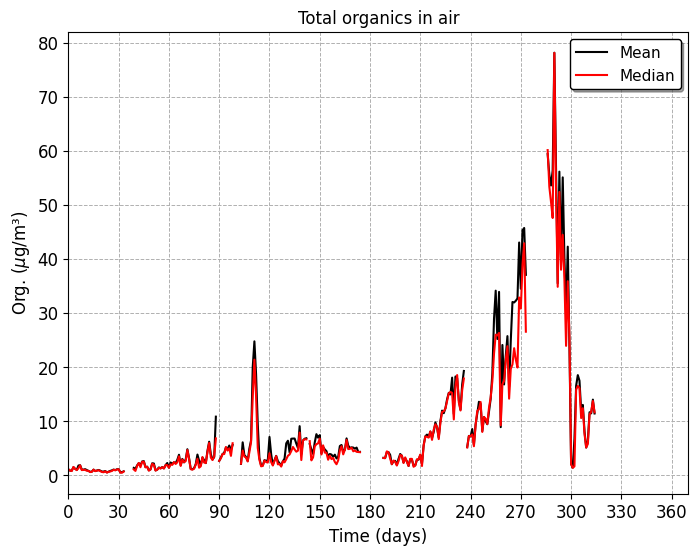

In [13]:
### Configurando a figura:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')
tf = 12
# tam_markers = 6
# loc_legendas = 2
limitesx = [0, 370]
# limitesy = [0.0, 26]
ax.set_xlabel('Time (days)', fontsize=tf)
ax.set_ylabel(labels[3]+' ($\mu$g/m³)', fontsize=tf)
ax.set_title("Total organics in air", fontsize=tf)
# ax.set_ylim(limitesy)
ax.set_xlim(limitesx)
ax.grid(visible=True, axis='both', linestyle='--', linewidth=0.7)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.tick_params(labelsize=tf)

# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     ax.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors='dimgray', linewidth=0.85)

ax.plot(np.arange(len(colunas15)), stats15[3].T['mean'], 'k-', label='Mean')
ax.plot(np.arange(len(colunas15)), stats15[3].T['50%'], 'r-', label='Median')
# ax.legend(loc='best', fancybox=True, fontsize=tf-1, edgecolor='k', facecolor='white')
ax.legend(loc='best', ncol=1, fontsize=tf-1, fancybox=True, shadow=True,
          facecolor='white', edgecolor='black')

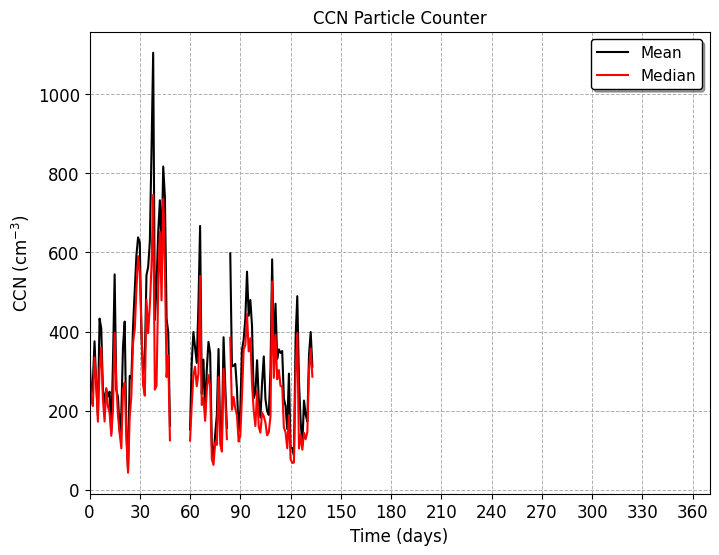

In [14]:
### Configurando a figura:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')
tf = 12
# tam_markers = 6
# loc_legendas = 2
limitesx = [0, 370]
# limitesy = [0.0, 4000.0]
ax.set_xlabel('Time (days)', fontsize=tf)
ax.set_ylabel(labels[4]+' (cm$^{-3}$)', fontsize=tf)
ax.set_title(u"CCN Particle Counter", fontsize=tf)
# ax.set_ylim(limitesy)
ax.set_xlim(limitesx)
ax.grid(visible=True, axis='both', linestyle='--', linewidth=0.7)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.tick_params(labelsize=tf)

# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     ax.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors='dimgray', linewidth=0.85)

ax.plot(np.arange(len(colunas15)), stats15[4].T['mean'], 'k-', label='Mean')
ax.plot(np.arange(len(colunas15)), stats15[4].T['50%'], 'r-', label='Median')
# ax.legend(loc='best', fancybox=True, fontsize=tf-1, edgecolor='k', facecolor='white')
ax.legend(loc='best', ncol=1, fontsize=tf-1, fancybox=True, shadow=True,
          facecolor='white', edgecolor='black')

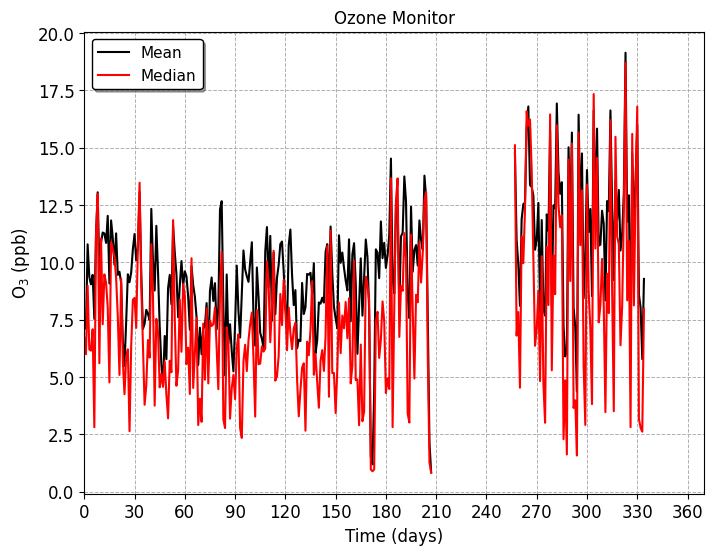

In [15]:
### Configurando a figura:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')
tf = 12
# tam_markers = 6
# loc_legendas = 2
limitesx = [0, 370]
# limitesy = [0.0, 30.0]
ax.set_xlabel('Time (days)', fontsize=tf)
ax.set_ylabel(labels[5]+' (ppb)', fontsize=tf)
ax.set_title(u"Ozone Monitor", fontsize=tf)
# ax.set_ylim(limitesy)
ax.set_xlim(limitesx)
ax.grid(visible=True, axis='both', linestyle='--', linewidth=0.7)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.tick_params(labelsize=tf)

# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     ax.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors='dimgray', linewidth=0.85)

ax.plot(np.arange(len(colunas15)), stats15[5].T['mean'], 'k-', label='Mean')
ax.plot(np.arange(len(colunas15)), stats15[5].T['50%'], 'r-', label='Median')
# ax.legend(loc='best', fancybox=True, fontsize=tf-1, edgecolor='k', facecolor='white')
ax.legend(loc='best', ncol=1, fontsize=tf-1, fancybox=True, shadow=True,
          facecolor='white', edgecolor='black')

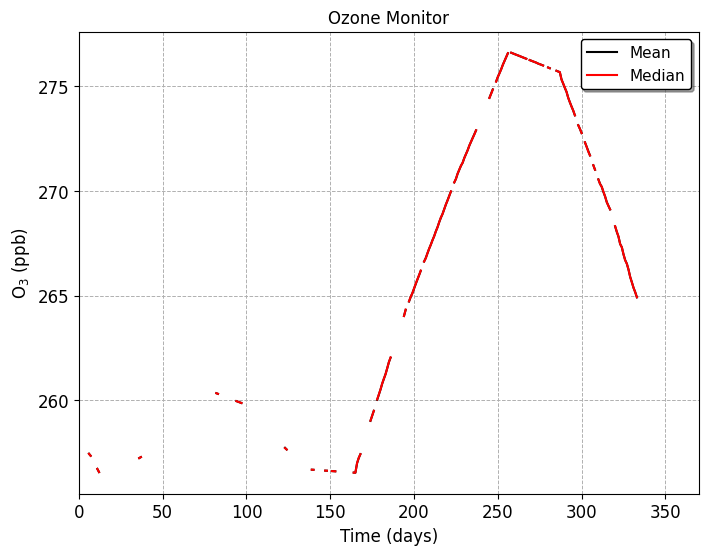

In [16]:
### Configurando a figura:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,6), facecolor='white')
tf = 12
# tam_markers = 6
# loc_legendas = 2
limitesx = [0, 370]
# limitesy = [0.0, 30.0]
ax.set_xlabel('Time (days)', fontsize=tf)
ax.set_ylabel(labels[6]+' (ppb)', fontsize=tf)
ax.set_title(u"Ozone Monitor", fontsize=tf)
# ax.set_ylim(limitesy)
ax.set_xlim(limitesx)
ax.grid(visible=True, axis='both', linestyle='--', linewidth=0.7)
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.xaxis.set_major_locator(ticker.MultipleLocator(30))
ax.tick_params(labelsize=tf)

# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     ax.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors='dimgray', linewidth=0.85)

ax.plot(np.arange(len(colunas15)), stats15[6].T['mean'], 'k-', label='Mean')
ax.plot(np.arange(len(colunas15)), stats15[6].T['50%'], 'r-', label='Median')
# ax.legend(loc='best', fancybox=True, fontsize=tf-1, edgecolor='k', facecolor='white')
ax.legend(loc='best', ncol=1, fontsize=tf-1, fancybox=True, shadow=True,
          facecolor='white', edgecolor='black')

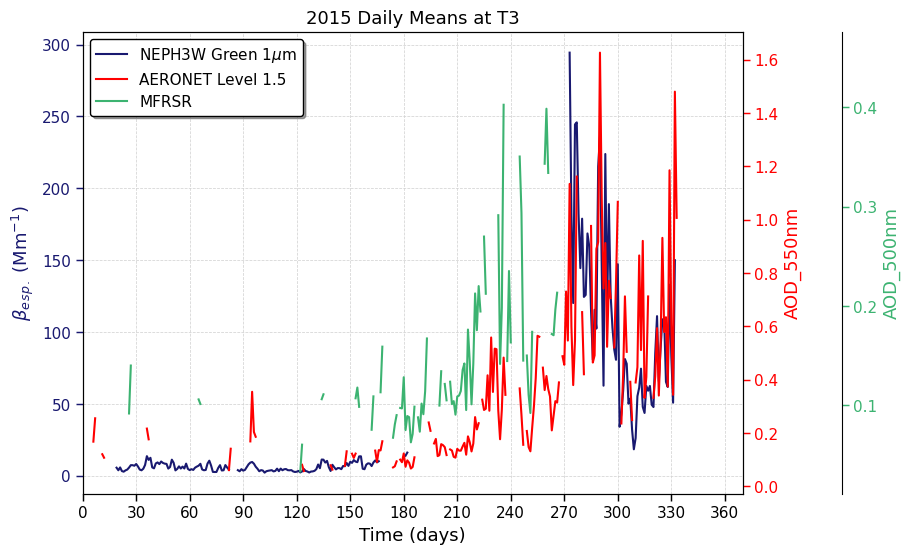

In [17]:
########################################## Configs:
cores = ['midnightblue', 'r', 'mediumseagreen', 'saddlebrown']
limitesx = [0, 370]
# limitesy = [0.0, 200.0]
# limitesyaod = [0.0, 1.0]
# # limitesyorg = [0.0, 26]
tf = 13

########################################## Elimina e acerta posições dos axes:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
fig, host = plt.subplots(figsize=(8,6), facecolor='white')
fig.subplots_adjust(right=0.95)
par1 = host.twinx()
par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.15))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

########################################## Setting dos limites, das legendas e plotting de cada variável:
p1, = host.plot(np.arange(len(colunas15)), stats15[0].T['mean'], color=cores[0], label="NEPH3W Green 1$\mu$m")
p2, = par1.plot(np.arange(len(colunas15)), stats15[1].T['mean'], color=cores[1], label="AERONET Level 1.5")
p3, = par2.plot(np.arange(len(colunas15)), stats15[2].T['mean'], color=cores[2], label="MFRSR")
host.set_xlim(limitesx)
# host.set_ylim(limitesy)
# par1.set_ylim(limitesyaod)
# par2.set_ylim(limitesyaod)
host.set_title(u"2015 Daily Means at T3", fontsize=tf)
host.set_xlabel('Time (days)', fontsize=tf)
host.set_ylabel(labels[0]+' (Mm$^{-1}$)', fontsize=tf)
par1.set_ylabel(labels[1]+'_550nm', fontsize=tf)
par2.set_ylabel(labels[2]+'_500nm', fontsize=tf)
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
tkw = dict(size=5, width=1.05)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)
plt.setp(host.get_xticklabels(), rotation=0, fontsize=tf-2)
plt.setp(host.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par1.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par2.get_yticklabels(), rotation=0, fontsize=tf-2)

host.xaxis.set_major_locator(ticker.MultipleLocator(30))
# host.yaxis.set_major_locator(ticker.MultipleLocator(10))
# par1.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
# par2.yaxis.set_major_locator(ticker.MultipleLocator(0.05))

lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], fontsize=tf-2, loc='upper left', ncol=1, fancybox=True,
            shadow=True, facecolor='white', edgecolor='black')
host.grid(visible=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.55)

# ### Desenhando linhas verticais delimitando os meses do ano:
# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     host.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors=cores[3], linewidth=0.85)

plt.show()

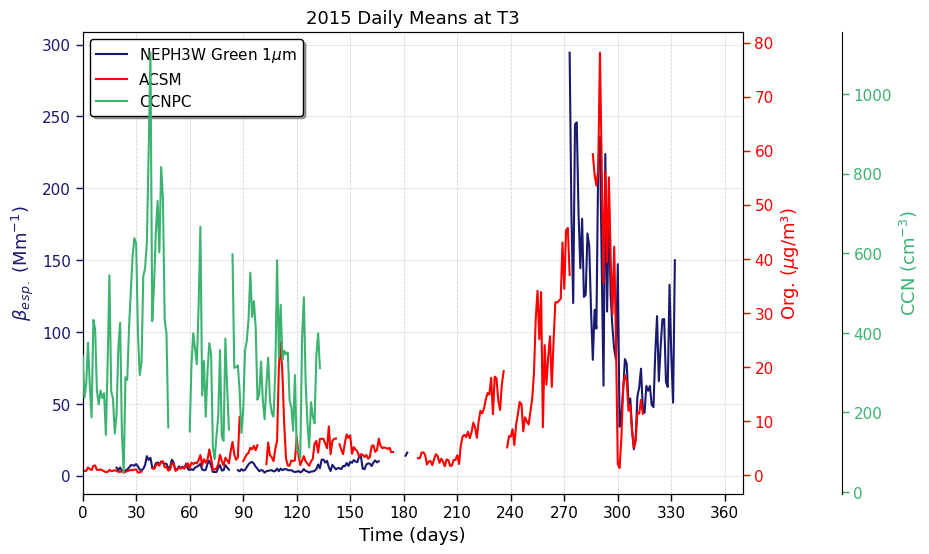

In [18]:
########################################## Configs:
cores = ['midnightblue', 'r', 'mediumseagreen', 'saddlebrown']
limitesx = [0, 370]
# limitesy = [0.0, 200.0]
# limitesyorg = [0.0, 26]
# limitesyccn = [0.0, 4000.0]
tf = 13

########################################## Elimina e acerta posições dos axes:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
fig, host = plt.subplots(figsize=(8,6), facecolor='white')
fig.subplots_adjust(right=0.95)
par1 = host.twinx()
par2 = host.twinx()
par2.spines["right"].set_position(("axes", 1.15))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

########################################## Setting dos limites, das legendas e plotting de cada variável:
p1, = host.plot(np.arange(len(colunas15)), stats15[0].T['mean'], color=cores[0], label="NEPH3W Green 1$\mu$m")
p2, = par1.plot(np.arange(len(colunas15)), stats15[3].T['mean'], color=cores[1], label="ACSM")
p3, = par2.plot(np.arange(len(colunas15)), stats15[4].T['mean'], color=cores[2], label="CCNPC")
host.set_xlim(limitesx)
# host.set_ylim(limitesy)
# par1.set_ylim(limitesyorg)
# par2.set_ylim(limitesyccn)
host.set_title(u"2015 Daily Means at T3", fontsize=tf)
host.set_xlabel('Time (days)', fontsize=tf)
host.set_ylabel(labels[0]+' (Mm$^{-1}$)', fontsize=tf)
par1.set_ylabel(labels[3]+' ($\mu$g/m³)', fontsize=tf)
par2.set_ylabel(labels[4]+' (cm$^{-3}$)', fontsize=tf)
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
tkw = dict(size=5, width=1.05)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)
plt.setp(host.get_xticklabels(), rotation=0, fontsize=tf-2)
plt.setp(host.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par1.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par2.get_yticklabels(), rotation=0, fontsize=tf-2)

host.xaxis.set_major_locator(ticker.MultipleLocator(30))
# host.yaxis.set_major_locator(ticker.MultipleLocator(10))
# par1.yaxis.set_major_locator(ticker.MultipleLocator(1))
# par2.yaxis.set_major_locator(ticker.MultipleLocator(200))

lines = [p1, p2, p3]
host.legend(lines, [l.get_label() for l in lines], fontsize=tf-2, loc='best', ncol=1, fancybox=True,
            shadow=True, facecolor='white', edgecolor='black')
host.grid(visible=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.55)

# ### Desenhando linhas verticais delimitando os meses do ano:
# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     host.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors=cores[3], linewidth=0.85)

plt.show()

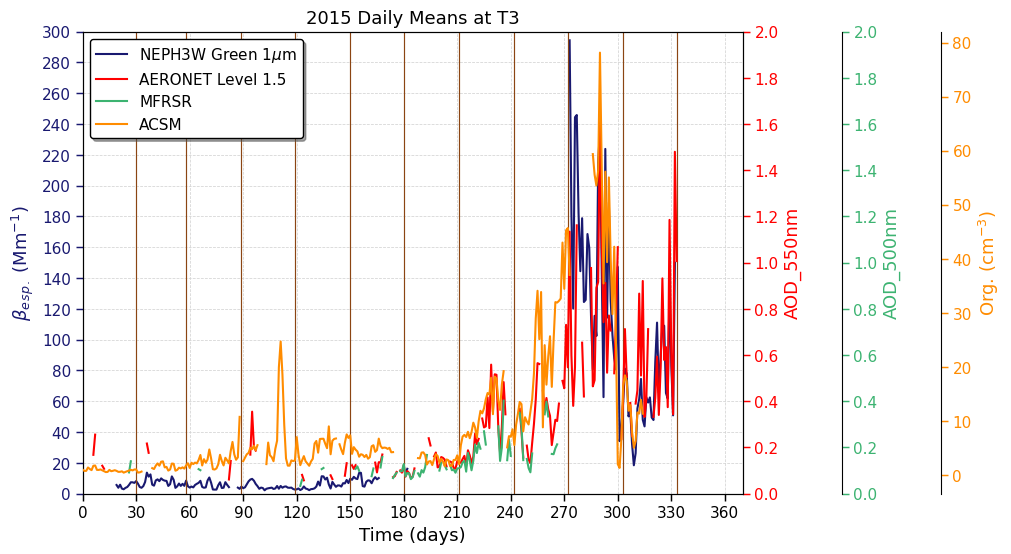

In [19]:
########################################## Configs:
cores = ['midnightblue', 'r', 'mediumseagreen', 'darkorange', 'saddlebrown']
limitesx = [0, 370]
limitesy = [0.0, 300.0]
limitesyaod = [0.0, 2.0]
limitesyorg = [0.0, 80.0]
tf = 13

########################################## Elimina e acerta posições dos axes:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
fig, host = plt.subplots(figsize=(8,6), facecolor='white')
fig.subplots_adjust(right=0.95)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par2.spines["right"].set_position(("axes", 1.15))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
par3.spines["right"].set_position(("axes", 1.30))
make_patch_spines_invisible(par3)
par3.spines["right"].set_visible(True)

########################################## Setting dos limites, das legendas e plotting de cada variável:
p1, = host.plot(np.arange(len(colunas15)), stats15[0].T['mean'], color=cores[0], label="NEPH3W Green 1$\mu$m")
p2, = par1.plot(np.arange(len(colunas15)), stats15[1].T['mean'], color=cores[1], label="AERONET Level 1.5")
p3, = par2.plot(np.arange(len(colunas15)), stats15[2].T['mean'], color=cores[2], label="MFRSR")
p4, = par3.plot(np.arange(len(colunas15)), stats15[3].T['mean'], color=cores[3], label="ACSM")
host.set_xlim(limitesx)
host.set_ylim(limitesy)
par1.set_ylim(limitesyaod)
par2.set_ylim(limitesyaod)
host.set_title(u"2015 Daily Means at T3", fontsize=tf)
host.set_xlabel('Time (days)', fontsize=tf)
host.set_ylabel(labels[0]+' (Mm$^{-1}$)', fontsize=tf)
par1.set_ylabel(labels[1]+'_550nm', fontsize=tf)
par2.set_ylabel(labels[2]+'_500nm', fontsize=tf)
par3.set_ylabel(labels[3]+' (cm$^{-3}$)', fontsize=tf)
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())
tkw = dict(size=5, width=1.05)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)
plt.setp(host.get_xticklabels(), rotation=0, fontsize=tf-2)
plt.setp(host.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par1.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par2.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par3.get_yticklabels(), rotation=0, fontsize=tf-2)

host.xaxis.set_major_locator(ticker.MultipleLocator(30))
host.yaxis.set_major_locator(ticker.MultipleLocator(20))
par1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
par2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
par3.yaxis.set_major_locator(ticker.MultipleLocator(10.0))

lines = [p1, p2, p3, p4]
host.legend(lines, [l.get_label() for l in lines], fontsize=tf-2, loc='upper left', ncol=1, fancybox=True,
            shadow=True, facecolor='white', edgecolor='black')
host.grid(visible=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.55)

### Desenhando linhas verticais delimitando os meses do ano:
for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
    host.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors=cores[4], linewidth=0.85)

plt.show()

In [20]:
##########################################

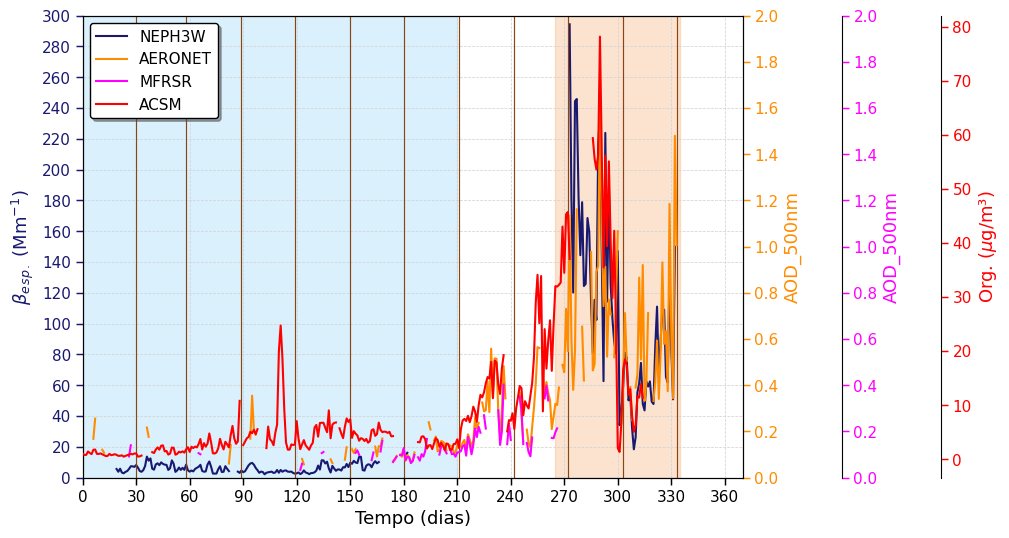

In [22]:
########################################## Configs:
cores = ['midnightblue', 'darkorange', 'magenta', 'r', 'saddlebrown']
limitesx = [0, 370]
limitesy = [0.0, 300.0]
limitesyaod = [0.0, 2.0]
limitesyorg = [0.0, 80.0]
tf = 13

########################################## Elimina e acerta posições dos axes:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
fig, host = plt.subplots(figsize=(8,6), facecolor='white')
fig.subplots_adjust(right=0.95)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par2.spines["right"].set_position(("axes", 1.15))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
par3.spines["right"].set_position(("axes", 1.30))
make_patch_spines_invisible(par3)
par3.spines["right"].set_visible(True)

########################################## Setting dos limites, das legendas e plotting de cada variável:
p1, = host.plot(np.arange(len(colunas15)), stats15[0].T['mean'], color=cores[0], label="NEPH3W")
p2, = par1.plot(np.arange(len(colunas15)), stats15[1].T['mean'], color=cores[1], label="AERONET")
p3, = par2.plot(np.arange(len(colunas15)), stats15[2].T['mean'], color=cores[2], label="MFRSR")
p4, = par3.plot(np.arange(len(colunas15)), stats15[3].T['mean'], color=cores[3], label="ACSM")
host.set_xlim(limitesx)
host.set_ylim(limitesy)
par1.set_ylim(limitesyaod)
par2.set_ylim(limitesyaod)
# host.set_title(u"Médias diárias para o T3 durante 2015", fontsize=tf)
host.set_xlabel('Tempo (dias)', fontsize=tf)
host.set_ylabel(labels[0]+' (Mm$^{-1}$)', fontsize=tf)
par1.set_ylabel(labels[1]+'_500nm', fontsize=tf)
par2.set_ylabel(labels[2]+'_500nm', fontsize=tf)
par3.set_ylabel(labels[3]+' ($\mu$g/m³)', fontsize=tf)
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())
tkw = dict(size=5, width=1.05)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)
plt.setp(host.get_xticklabels(), rotation=0, fontsize=tf-2)
plt.setp(host.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par1.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par2.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par3.get_yticklabels(), rotation=0, fontsize=tf-2)

host.xaxis.set_major_locator(ticker.MultipleLocator(30))
host.yaxis.set_major_locator(ticker.MultipleLocator(20))
par1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
par2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
par3.yaxis.set_major_locator(ticker.MultipleLocator(10.0))

lines = [p1, p2, p3, p4]
host.legend(lines, [l.get_label() for l in lines], fontsize=tf-2, loc='upper left', ncol=1, fancybox=True,
            shadow=True, facecolor='white', edgecolor='black')
host.grid(visible=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.55)

### Desenhando linhas verticais delimitando os meses do ano:
for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
    host.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors=cores[4], linewidth=0.85)
    
host.axvspan(xmin=0, xmax=210, color='lightskyblue', alpha=0.3)
host.axvspan(xmin=265, xmax=335, color='sandybrown', alpha=0.3)

# plt.show()
plt.savefig('/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/Series_Cenarios_2015.png', 
            dpi=400, bbox_inches='tight', facecolor='white')

In [24]:
# directory = '/mnt/HD_500GB_WD/historia2/Z-Copia_Notebooks_selecionados-Final/'
# stats15[0].to_pickle(directory+'estatisticas_Beta15.pkl')
# stats15[3].to_pickle(directory+'estatisticas_Org15.pkl')
# stats15[1].to_pickle(directory+'estatisticas_AOD_aeronet15.pkl')
# stats15[2].to_pickle(directory+'estatisticas_AOD_mfrsr15.pkl')

In [46]:
print(len(stats15[0].columns))
print(len(stats15[1].columns))
print(len(stats15[2].columns))
print(len(stats15[3].columns))
print(len(stats15[4].columns))
print(len(stats15[5].columns))
print(len(stats15[6].columns))

365
365
365
365
365
365
365


In [51]:
from termcolor import colored
diaslimpa, diaspoluida, diastransicao1 = [], [], []

for i, col in enumerate(stats15[0].columns):
    if (i>=0) and (i<=210):
        print(colored('{0} {1}'.format(i, col), 'blue'))
        diaslimpa.append(col)
    elif (i>=211) and (i<=264):
        print('{0} {1}'.format(i, col))
        diastransicao1.append(col)
    elif (i>=265) and (i<=335):
        print(colored('{0} {1}'.format(i, col), 'red'))
        diaspoluida.append(col)

0 01/01/2015
1 02/01/2015
2 03/01/2015
3 04/01/2015
4 05/01/2015
5 06/01/2015
6 07/01/2015
7 08/01/2015
8 09/01/2015
9 10/01/2015
10 11/01/2015
11 12/01/2015
12 13/01/2015
13 14/01/2015
14 15/01/2015
15 16/01/2015
16 17/01/2015
17 18/01/2015
18 19/01/2015
19 20/01/2015
20 21/01/2015
21 22/01/2015
22 23/01/2015
23 24/01/2015
24 25/01/2015
25 26/01/2015
26 27/01/2015
27 28/01/2015
28 29/01/2015
29 30/01/2015
30 31/01/2015
31 01/02/2015
32 02/02/2015
33 03/02/2015
34 04/02/2015
35 05/02/2015
36 06/02/2015
37 07/02/2015
38 08/02/2015
39 09/02/2015
40 10/02/2015
41 11/02/2015
42 12/02/2015
43 13/02/2015
44 14/02/2015
45 15/02/2015
46 16/02/2015
47 17/02/2015
48 18/02/2015
49 19/02/2015
50 20/02/2015
51 21/02/2015
52 22/02/2015
53 23/02/2015
54 24/02/2015
55 25/02/2015
56 26/02/2015
57 27/02/2015
58 28/02/2015
59 01/03/2015
60 02/03/2015
61 03/03/2015
62 04/03/2015
63 05/03/2015
64 06/03/2015
65 07/03/2015
66 08/03/2015
67 09/03/2015
68 10/03/2015
69 11/03/2015
70 12/03/2015
71 13/03/2015
72

In [52]:
nans1, nans2, nans3 = [], [], []
for i in range(len(diaslimpa)):
    nans1.append(np.nan)
for i in range(len(diastransicao1)):
    nans2.append(np.nan)
for i in range(len(diaspoluida)):
    nans3.append(np.nan)

In [54]:
d1, d2, dt1 = {}, {}, {}
for col in diaslimpa:
    d1.update({col:[np.nan, np.nan]})
dfdlimpa = pd.DataFrame(d1)
for col in diaspoluida:
    d2.update({col:[np.nan, np.nan]})
dfdpoluida = pd.DataFrame(d2)
for col in diastransicao1:
    dt1.update({col:[np.nan, np.nan]})
dfdtransicao1 = pd.DataFrame(dt1)

directory = '/mnt/HD_500GB_WD/historia2/Analises_Aerossois/'
dfdlimpa.to_pickle(directory+'diaslimpa15.pkl')
dfdpoluida.to_pickle(directory+'diaspoluida15.pkl')
dfdtransicao1.to_pickle(directory+'diastransicao15_1.pkl')

In [55]:
# with open("output.txt", "w") as fp:
#     fp.writelines('{0}\n'.format(items) for items in diastransicao)

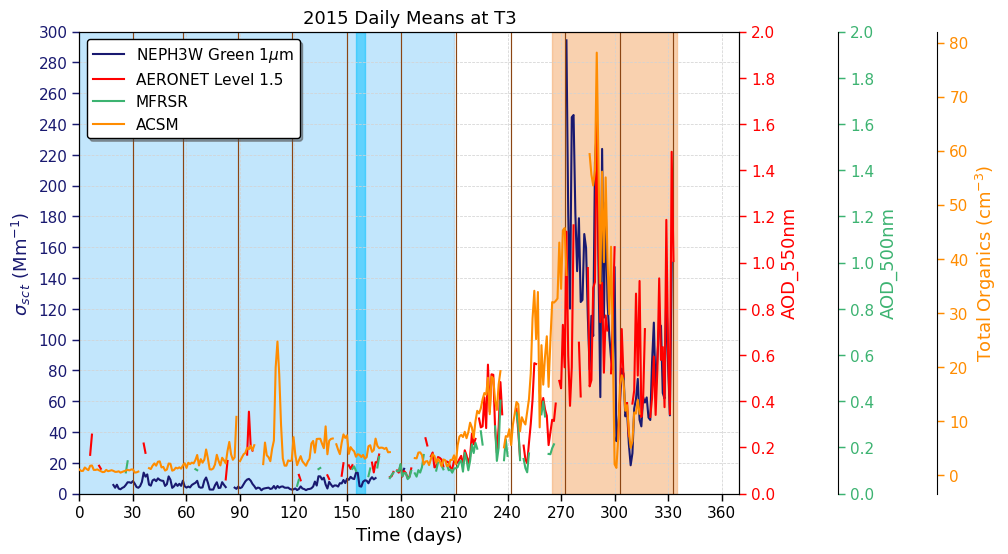

In [60]:
########################################## Configs:
cores = ['midnightblue', 'r', 'mediumseagreen', 'darkorange', 'saddlebrown']
limitesx = [0, 370]
limitesy = [0.0, 300.0]
limitesyaod = [0.0, 2.0]
limitesyorg = [0.0, 80.0]
tf = 13

########################################## Elimina e acerta posições dos axes:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
fig, host = plt.subplots(figsize=(8,6), facecolor='white')
fig.subplots_adjust(right=0.95)
par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par2.spines["right"].set_position(("axes", 1.15))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)
par3.spines["right"].set_position(("axes", 1.30))
make_patch_spines_invisible(par3)
par3.spines["right"].set_visible(True)

########################################## Setting dos limites, das legendas e plotting de cada variável:
p1, = host.plot(np.arange(len(colunas15)), stats15[0].T['mean'], color=cores[0], label="NEPH3W Green 1$\mu$m")
p2, = par1.plot(np.arange(len(colunas15)), stats15[1].T['mean'], color=cores[1], label="AERONET Level 1.5")
p3, = par2.plot(np.arange(len(colunas15)), stats15[2].T['mean'], color=cores[2], label="MFRSR")
p4, = par3.plot(np.arange(len(colunas15)), stats15[3].T['mean'], color=cores[3], label="ACSM")
host.set_xlim(limitesx)
host.set_ylim(limitesy)
par1.set_ylim(limitesyaod)
par2.set_ylim(limitesyaod)
host.set_title(u"2015 Daily Means at T3", fontsize=tf)
host.set_xlabel('Time (days)', fontsize=tf)
host.set_ylabel(labels[0]+' (Mm$^{-1}$)', fontsize=tf)
par1.set_ylabel(labels[1]+'_550nm', fontsize=tf)
par2.set_ylabel(labels[2]+'_500nm', fontsize=tf)
par3.set_ylabel(labels[3]+' (cm$^{-3}$)', fontsize=tf)
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())
tkw = dict(size=5, width=1.05)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)
plt.setp(host.get_xticklabels(), rotation=0, fontsize=tf-2)
plt.setp(host.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par1.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par2.get_yticklabels(), rotation=0, fontsize=tf-2)
plt.setp(par3.get_yticklabels(), rotation=0, fontsize=tf-2)

host.xaxis.set_major_locator(ticker.MultipleLocator(30))
host.yaxis.set_major_locator(ticker.MultipleLocator(20))
par1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
par2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
par3.yaxis.set_major_locator(ticker.MultipleLocator(10.0))

lines = [p1, p2, p3, p4]
host.legend(lines, [l.get_label() for l in lines], fontsize=tf-2, loc='upper left', ncol=1, fancybox=True,
            shadow=True, facecolor='white', edgecolor='black')
host.grid(visible=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.55)

### Desenhando linhas verticais delimitando os meses do ano:
for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
    host.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors=cores[4], linewidth=0.85)
    
host.axvspan(xmin=0, xmax=210, color='lightskyblue', alpha=0.5)
host.axvspan(xmin=265, xmax=335, color='sandybrown', alpha=0.5)

host.axvspan(xmin=155, xmax=160, color='deepskyblue', alpha=0.5)

plt.show()

In [61]:
##############################################

In [62]:
# # ####### "dias_fundo" que vem do "Descobrindo_dias_pluma_clusters.ipynb":
# dias_fundo = ['25/02/2015', '03/05/2015', '04/05/2015']

# dias_fundo_n = [55, 122, 123]

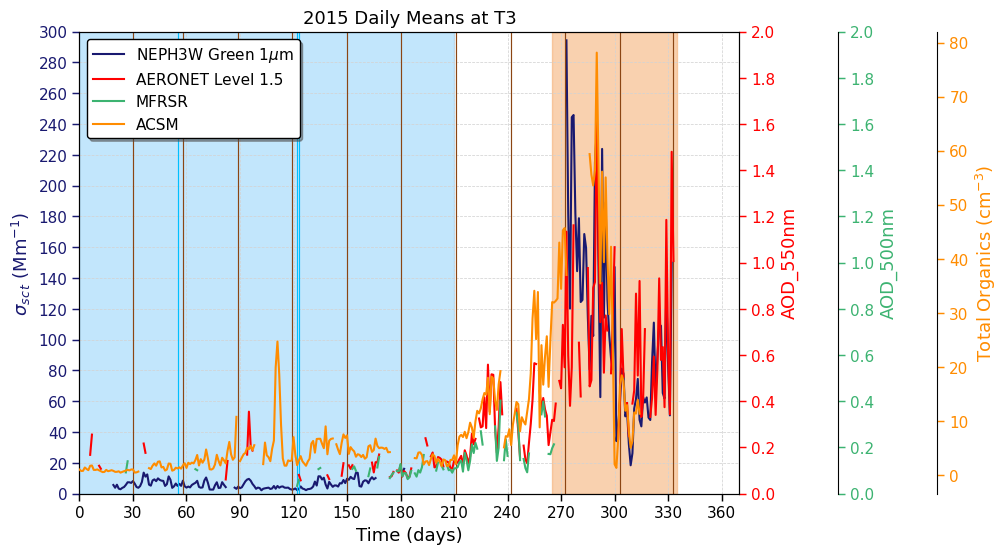

In [63]:
# ########################################## Configs:
# cores = ['midnightblue', 'r', 'mediumseagreen', 'darkorange', 'saddlebrown']
# limitesx = [0, 370]
# limitesy = [0.0, 300.0]
# limitesyaod = [0.0, 2.0]
# limitesyorg = [0.0, 80.0]
# tf = 13

# ########################################## Elimina e acerta posições dos axes:
# def make_patch_spines_invisible(ax):
#     ax.set_frame_on(True)
#     ax.patch.set_visible(False)
#     for sp in ax.spines.values():
#         sp.set_visible(False)
# fig, host = plt.subplots(figsize=(8,6), facecolor='white')
# fig.subplots_adjust(right=0.95)
# par1 = host.twinx()
# par2 = host.twinx()
# par3 = host.twinx()
# par2.spines["right"].set_position(("axes", 1.15))
# make_patch_spines_invisible(par2)
# par2.spines["right"].set_visible(True)
# par3.spines["right"].set_position(("axes", 1.30))
# make_patch_spines_invisible(par3)
# par3.spines["right"].set_visible(True)

# ########################################## Setting dos limites, das legendas e plotting de cada variável:
# p1, = host.plot(np.arange(len(colunas15)), stats15[0].T['mean'], color=cores[0], label="NEPH3W Green 1$\mu$m")
# p2, = par1.plot(np.arange(len(colunas15)), stats15[1].T['mean'], color=cores[1], label="AERONET Level 1.5")
# p3, = par2.plot(np.arange(len(colunas15)), stats15[2].T['mean'], color=cores[2], label="MFRSR")
# p4, = par3.plot(np.arange(len(colunas15)), stats15[3].T['mean'], color=cores[3], label="ACSM")
# host.set_xlim(limitesx)
# host.set_ylim(limitesy)
# par1.set_ylim(limitesyaod)
# par2.set_ylim(limitesyaod)
# host.set_title(u"2015 Daily Means at T3", fontsize=tf)
# host.set_xlabel('Time (days)', fontsize=tf)
# host.set_ylabel(labels[0]+' (Mm$^{-1}$)', fontsize=tf)
# par1.set_ylabel(labels[1]+'_550nm', fontsize=tf)
# par2.set_ylabel(labels[2]+'_500nm', fontsize=tf)
# par3.set_ylabel(labels[3]+' (cm$^{-3}$)', fontsize=tf)
# host.yaxis.label.set_color(p1.get_color())
# par1.yaxis.label.set_color(p2.get_color())
# par2.yaxis.label.set_color(p3.get_color())
# par3.yaxis.label.set_color(p4.get_color())
# tkw = dict(size=5, width=1.05)
# host.tick_params(axis='y', colors=p1.get_color(), **tkw)
# par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
# par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
# par3.tick_params(axis='y', colors=p4.get_color(), **tkw)
# host.tick_params(axis='x', **tkw)
# plt.setp(host.get_xticklabels(), rotation=0, fontsize=tf-2)
# plt.setp(host.get_yticklabels(), rotation=0, fontsize=tf-2)
# plt.setp(par1.get_yticklabels(), rotation=0, fontsize=tf-2)
# plt.setp(par2.get_yticklabels(), rotation=0, fontsize=tf-2)
# plt.setp(par3.get_yticklabels(), rotation=0, fontsize=tf-2)

# host.xaxis.set_major_locator(ticker.MultipleLocator(30))
# host.yaxis.set_major_locator(ticker.MultipleLocator(20))
# par1.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
# par2.yaxis.set_major_locator(ticker.MultipleLocator(0.2))
# par3.yaxis.set_major_locator(ticker.MultipleLocator(10.0))

# lines = [p1, p2, p3, p4]
# host.legend(lines, [l.get_label() for l in lines], fontsize=tf-2, loc='upper left', ncol=1, fancybox=True,
#             shadow=True, facecolor='white', edgecolor='black')
# host.grid(visible=True, which='both', axis='both', color='lightgrey', linestyle='--', linewidth=0.55)

# ### Desenhando linhas verticais delimitando os meses do ano:
# for mes, n in zip([0,1,2,3,4,5,6,7,8,9,10],[30,58,89,119,150,180,211,242,272,303,333]):
#     host.vlines(x=n, ymin=limitesy[0], ymax=limitesy[1], colors=cores[4], linewidth=0.85)
    
# host.axvspan(xmin=0, xmax=210, color='lightskyblue', alpha=0.5)
# host.axvspan(xmin=265, xmax=335, color='sandybrown', alpha=0.5)

# ##################################################################################################
# for j in dias_fundo_n:
#     host.vlines(x=j, ymin=limitesy[0], ymax=limitesy[1], colors='deepskyblue', linewidth=0.85)

# plt.show()